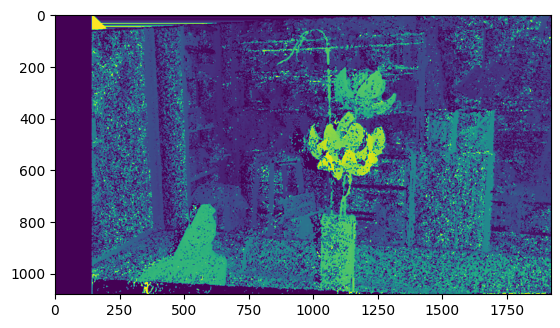

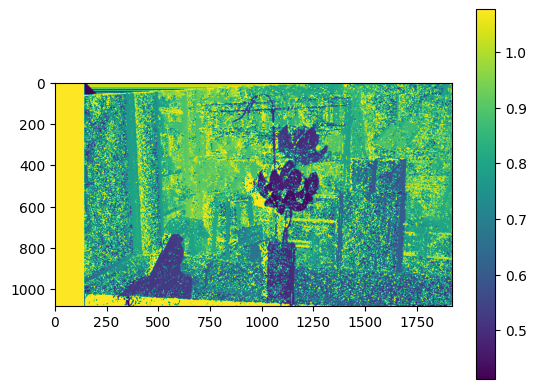

In [6]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

def calculate_distance(disparity, focal_length, baseline):
    depth_map = focal_length * baseline / disparity
    return depth_map

def main():
    # Load stereo images
    img_left = cv2.imread('im0.png')
    img_right = cv2.imread('im1.png')

    gray_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
    gray_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)

    min_disparity = 55
    num_disparities = 142 - 55 #170?
    block_size = 5
    stereo = cv2.StereoSGBM_create(
        minDisparity=min_disparity,
        numDisparities=num_disparities,
        blockSize=block_size
    )

    disparity = stereo.compute(gray_left, gray_right).astype(np.float32) #/ 16

    # Set focal length (in pixels) and baseline (in meters)
    focal_length = 1733.74
    baseline = 0.53662

    depth_map = calculate_distance(disparity, focal_length, baseline)

    return disparity / num_disparities,depth_map# / 100

if __name__ == "__main__":
    disparity, depth = main()

plt.imshow(disparity)
plt.show()
plt.imshow(depth)
plt.colorbar()
plt.show()



